In [ ]:
# CNN model for Bird species classification problem

!unzip '/content/drive/MyDrive/train_data.zip'


unzip:  cannot find or open /content/drive/MyDrive/train_data.zip, /content/drive/MyDrive/train_data.zip.zip or /content/drive/MyDrive/train_data.zip.ZIP.


In [ ]:
!unzip '/content/drive/MyDrive/test_data.zip'

unzip:  cannot find or open /content/drive/MyDrive/test_data.zip, /content/drive/MyDrive/test_data.zip.zip or /content/drive/MyDrive/test_data.zip.ZIP.


In [ ]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Shear_range means tranformation
train_gen = ImageDataGenerator(rescale=(1./255), horizontal_flip=True, shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [ ]:
train = train_gen.flow_from_directory('/content/drive/MyDrive/train_data', 
                                      target_size = (120, 120),
                                      class_mode='categorical',
                                      batch_size=8)

test = test_gen.flow_from_directory('/content/drive/MyDrive/test_data',
                                    target_size = (120, 120),
                                      class_mode='categorical',
                                      batch_size=8)


Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [ ]:
#  CNN

"""
  1. Convolution Layer
  2. Pooling Layer
  3. Flatten Layer
  4. Fully Connected Layer
"""

from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Convolution2D(20, (3, 3), activation='relu', input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(45, activation='relu'))
model.add(Dense(16, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train, batch_size=8, validation_data=test, epochs=10)

Epoch 1/10
19/19 [==============================] - 198s 11s/step - loss: 4.1608 - accuracy: 0.1200 - val_loss: 2.8525 - val_accuracy: 0.0573
Epoch 2/10
19/19 [==============================] - 106s 6s/step - loss: 2.6190 - accuracy: 0.1000 - val_loss: 2.6918 - val_accuracy: 0.0764
Epoch 3/10
19/19 [==============================] - 129s 7s/step - loss: 2.4346 - accuracy: 0.1800 - val_loss: 2.6334 - val_accuracy: 0.1975
Epoch 4/10
19/19 [==============================] - 138s 7s/step - loss: 2.3412 - accuracy: 0.2400 - val_loss: 2.6269 - val_accuracy: 0.1529
Epoch 5/10
19/19 [==============================] - 129s 7s/step - loss: 2.2792 - accuracy: 0.2533 - val_loss: 2.7551 - val_accuracy: 0.1274
Epoch 6/10
19/19 [==============================] - 128s 7s/step - loss: 2.1649 - accuracy: 0.3000 - val_loss: 2.6293 - val_accuracy: 0.1847
Epoch 7/10
19/19 [==============================] - 107s 6s/step - loss: 2.0391 - accuracy: 0.3667 - val_loss: 2.6122 - val_accuracy: 0.1783
Epoch 8/10
1

In [ ]:
model.save('first_model.h5')

In [ ]:
# Testing

import numpy as np
from tensorflow.keras.preprocessing import image

img1 = image.load_img('/content/hilpig.jpeg', target_size=(120, 120))
img2 = image.load_img('/content/blasti.png', target_size=(120, 120))
img3 = image.load_img('/content/himgri.jpeg', target_size=(120, 120))
img4 = image.load_img('/content/indvul.jpeg', target_size=(120, 120))

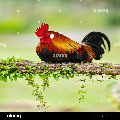

In [ ]:
img1

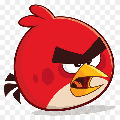

In [ ]:
img2

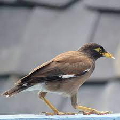

In [ ]:
img3

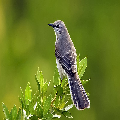

In [ ]:
img4

In [ ]:
img1 = image.img_to_array(img1)
img2 = image.img_to_array(img2)
img3 = image.img_to_array(img3)
img4 = image.img_to_array(img4)

In [ ]:
img1 = np.expand_dims(img1, axis=0)
img2 = np.expand_dims(img2, axis=0)
img3 = np.expand_dims(img3, axis=0)
img4 = np.expand_dims(img4, axis=0)


In [ ]:
pred1 = model.predict(img1)
pred2 = model.predict(img2)
pred3 = model.predict(img3)
pred4 = model.predict(img4)

1/1 [==============================] - 0s 40ms/step


In [ ]:
pred1 = np.argmax(pred1)
pred2 = np.argmax(pred2)
pred3 = np.argmax(pred3)
pred4 = np.argmax(pred4)

In [ ]:
pred1, pred2, pred3, pred4

(0, 0, 2, 0)

In [ ]:
species = list(train.class_indices.keys())
species

['blasti',
 'bonegl',
 'brhkyt',
 'cbrtsh',
 'cmnmyn',
 'gretit',
 'hilpig',
 'himbul',
 'himgri',
 'hsparo',
 'indvul',
 'jglowl',
 'lbicrw',
 'mgprob',
 'rebimg',
 'wcrsrt']

In [ ]:
species[pred1], species[pred2], species[pred3], species[pred4]

('blasti', 'blasti', 'brhkyt', 'blasti')

In [ ]:
# Out of 4 only 1 is predicted correctly!

In [ ]:
# Since the accuracy is quite low, we will tune the model to improve accuracy



# Model Tuning

In [ ]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(16, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 64)      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train, batch_size=32, validation_data=test, epochs=150)

Epoch 1/50
19/19 [==============================] - 118s 6s/step - loss: 2.7690 - accuracy: 0.1133 - val_loss: 2.7125 - val_accuracy: 0.1720
Epoch 2/50
19/19 [==============================] - 131s 7s/step - loss: 2.5500 - accuracy: 0.1733 - val_loss: 2.7743 - val_accuracy: 0.1720
Epoch 3/50
19/19 [==============================] - 130s 7s/step - loss: 2.4069 - accuracy: 0.2267 - val_loss: 2.7069 - val_accuracy: 0.1656
Epoch 4/50
19/19 [==============================] - 130s 7s/step - loss: 2.2387 - accuracy: 0.3133 - val_loss: 2.7956 - val_accuracy: 0.1847
Epoch 5/50
19/19 [==============================] - 124s 7s/step - loss: 2.1532 - accuracy: 0.3333 - val_loss: 2.6981 - val_accuracy: 0.2357
Epoch 6/50
19/19 [==============================] - 130s 7s/step - loss: 1.9559 - accuracy: 0.3600 - val_loss: 2.8985 - val_accuracy: 0.2166
Epoch 7/50
19/19 [==============================] - 129s 7s/step - loss: 1.7787 - accuracy: 0.3933 - val_loss: 2.8129 - val_accuracy: 0.2166
Epoch 8/50
19

In [ ]:
pred1 = model.predict(img1)
pred2 = model.predict(img2)
pred3 = model.predict(img3)
pred4 = model.predict(img4)

pred1 = np.argmax(pred1)
pred2 = np.argmax(pred2)
pred3 = np.argmax(pred3)
pred4 = np.argmax(pred4)

pred1, pred2, pred3, pred4


1/1 [==============================] - 0s 72ms/step


(5, 7, 8, 5)

In [ ]:
species[pred1], species[pred2], species[pred3], species[pred4]

('gretit', 'himbul', 'himgri', 'gretit')

In [ ]:
# Model tuning 

train = train_gen.flow_from_directory('/content/drive/MyDrive/train_data', 
                                      target_size = (64, 64),
                                      class_mode='categorical',
                                      batch_size=8)

test = test_gen.flow_from_directory('/content/drive/MyDrive/test_data',
                                    target_size = (64, 64),
                                      class_mode='categorical',
                                      batch_size=8)


Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(16, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

model.fit(train, batch_size=32, validation_data=test, epochs=15)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)        

In [ ]:
# Let's make prediction
img1 = image.load_img('/content/hilpig.jpeg', target_size=(64, 64))
img2 = image.load_img('/content/blasti.png', target_size=(64, 64))
img3 = image.load_img('/content/himgri.jpeg', target_size=(64, 64))
img4 = image.load_img('/content/indvul.jpeg', target_size=(64, 64))


img1 = image.img_to_array(img1)
img2 = image.img_to_array(img2)
img3 = image.img_to_array(img3)
img4 = image.img_to_array(img4)

img1 = np.expand_dims(img1, axis=0)
img2 = np.expand_dims(img2, axis=0)
img3 = np.expand_dims(img3, axis=0)
img4 = np.expand_dims(img4, axis=0)


pred1 = model.predict(img1)
pred2 = model.predict(img2)
pred3 = model.predict(img3)
pred4 = model.predict(img4)

pred1 = np.argmax(pred1)
pred2 = np.argmax(pred2)
pred3 = np.argmax(pred3)
pred4 = np.argmax(pred4)

pred1, pred2, pred3, pred4

species[pred1], species[pred2], species[pred3], species[pred4]

1/1 [==============================] - 0s 30ms/step


('himbul', 'himbul', 'hsparo', 'himbul')

In [ ]:
# Still the accuracy is not good, we'll again tune the model

train = train_gen.flow_from_directory('/content/drive/MyDrive/train_data', 
                                      target_size = (64, 64),
                                      class_mode='categorical',
                                      batch_size=8)

test = test_gen.flow_from_directory('/content/drive/MyDrive/test_data',
                                    target_size = (64, 64),
                                      class_mode='categorical',
                                      batch_size=8)


model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(16, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

model.fit(train, batch_size=32, validation_data=test, epochs=50)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 12, 12, 128)       73856     
                                    

In [ ]:
model.save('model_acc30.h5')